In [22]:
#Emotion Recognition 
#Import libraries 
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#Define the path for dataset folders: Training, Validation and Test  
train_path = r"/Users/vpriyanca/Downloads/ML Project_1_2/images_ER/images/train"
test_path = r"/Users/vpriyanca/Downloads/ML Project_1_2/images_ER/images/validation"

no_of_classes = 7

#Creating data generators for training and validation sets 
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size=(48, 48), batch_size=128,color_mode="grayscale", class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_path, target_size=(48, 48), batch_size=128,color_mode="grayscale",class_mode='categorical')
#test_generator = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

# Create CNN model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),padding="same", activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(5,5),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3),padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

model.summary()

#Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Model training on train and test set 
history = model.fit(train_generator, epochs=5, validation_data=test_generator)

#Model Evaluation on test set 
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

#Generate prediction for test set 
predictions = model.predict(test_generator)

#Compute confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_generator.classes, y_pred=np.argmax(predictions, axis=-1))
print(cm)



Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 128)       204928    
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 12, 12, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 12, 12, 512)       590336    
                                   

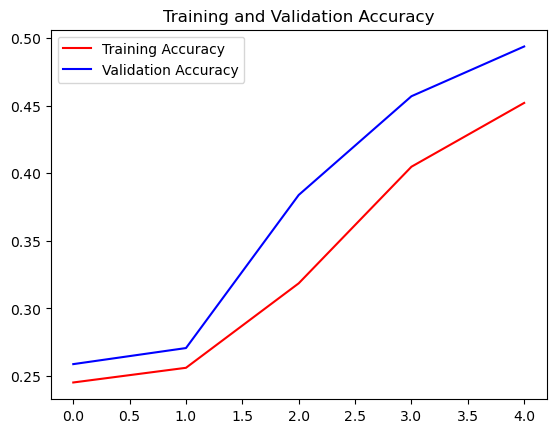

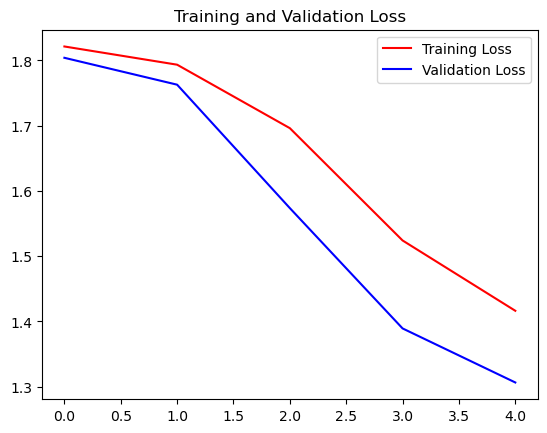

In [23]:
#Plot training and validation accuracy and loss curves 
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
#Model training on train and test set 
history = model.fit(train_generator, epochs=25, validation_data=test_generator)

#Model Evaluation on test set 
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)